In [1]:
import pandas as pd
import numpy as np

from data_utils import data_load, arch_data_load
from plot_utils import plot_trend_seasonal_residual, plot_ACF_PACF, plot_model_fit, plot_model_ACF_PACF, plot_rolling_predictions
from test_utils import ADF_test, KPSS_test, arch_ADF_KPSS_test
from forecast import plot_forecast, rolling_prediction
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore')

# SARIMA

## 1-1. Data load & Data Check

<AxesSubplot:xlabel='Date'>

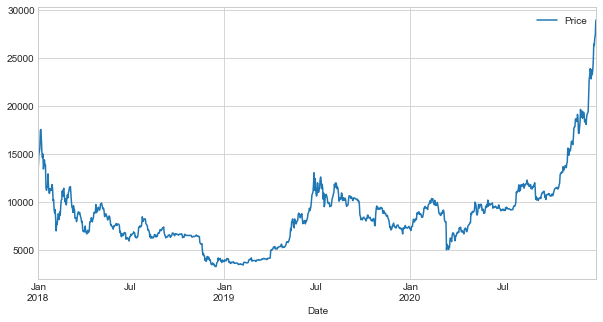

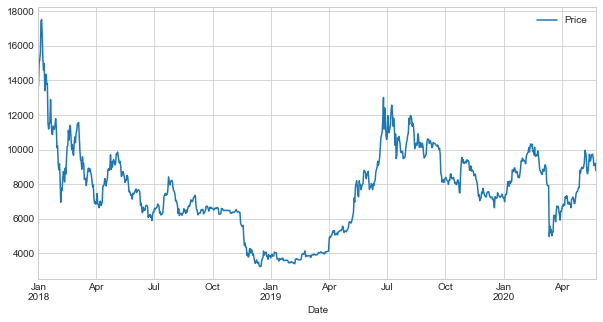

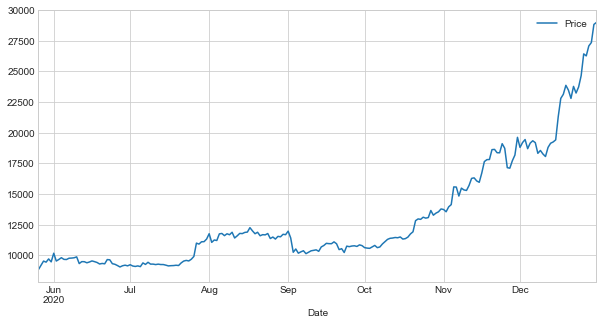

In [2]:
# Data load & plotting
data_dir = 'C:\\Users\\Yang\\Desktop\\bitcoin_code\\data\\BTC-USD.csv'

data, train_data, test_data = data_load(data_dir, 0.2)
diff_data, train_diff_data, test_diff_data = data_load(data_dir, 0.2, type='difference')
log_data, train_log_data, test_log_data = data_load(data_dir, 0.2, type='log')
log_diff_data, train_log_diff_data, test_log_diff_data = data_load(data_dir, 0.2, type='log_difference')

data.plot(figsize=(10,5))
train_data.plot(figsize=(10,5))
test_data.plot(figsize=(10,5))

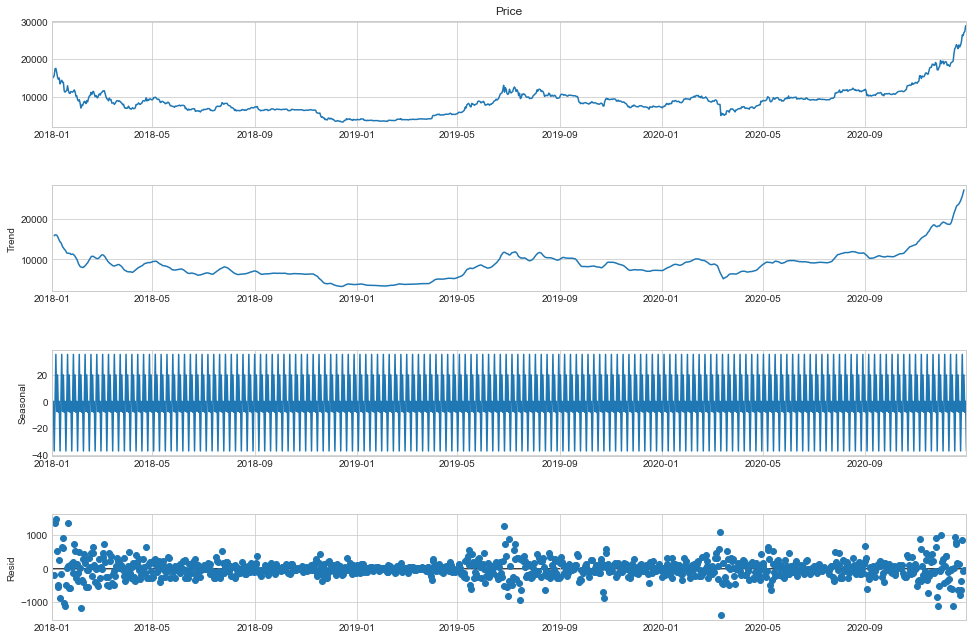

In [3]:
# Check trend, seasonal, residual
plot_trend_seasonal_residual(data)

## 1-2. Model Identification

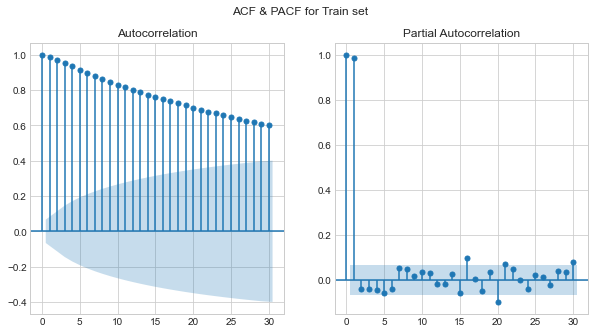

In [4]:
# Not Difference & Log
plot_ACF_PACF(train_data)

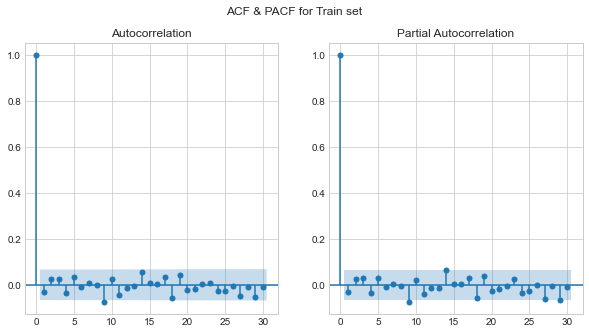

In [5]:
# Difference
plot_ACF_PACF(train_diff_data)

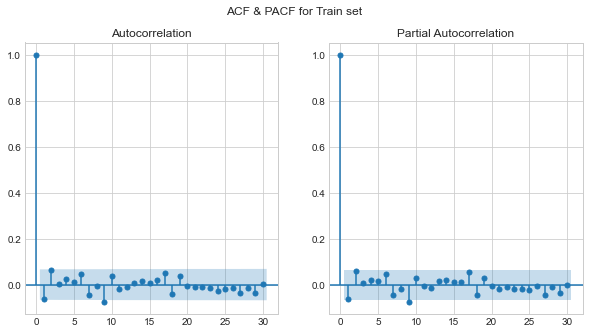

In [6]:
# Log + Difference
plot_ACF_PACF(train_log_diff_data)

In [7]:
# Stationarity Test : ADF
ADF_test(train_data, train_diff_data, train_log_diff_data)

# Stationarity Test : KPSS
KPSS_test(train_data, train_diff_data, train_log_diff_data)

raw: 0.019724
diff: 0.000000
log: 0.000000
raw: 0.021957
diff: 0.100000
log: 0.100000


## 1-3. Parameter Estimation & Diagnosis

In [8]:
# SARIMA model(Not log)
res_arima = auto_arima(train_data, m=7, seasonal=True, start_p=1, max_p=12, start_q=1, max_q=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False) 
print(res_arima.summary())

 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=12767.306, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=12769.188, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=12768.044, Time=0.17 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=12769.174, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=12768.387, Time=0.34 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=12769.627, Time=0.45 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=12768.117, Time=0.16 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=12769.738, Time=0.46 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=12771.843, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=12769.163, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=12771.043, Time=0.27 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=12769.925, Time=0.65 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=12771.029, Time=0.28 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=12770.169, Time=0.68 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=12771.497, Time=1.13

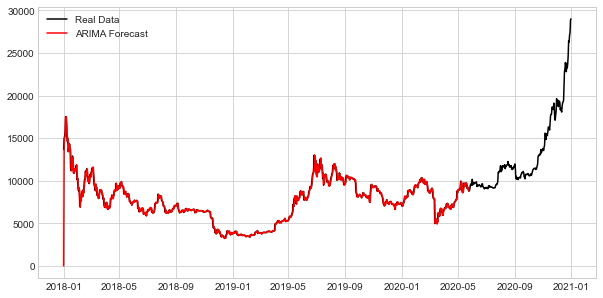

In [9]:
# Check model with train_data
plot_model_fit(data, train_data, res_arima)

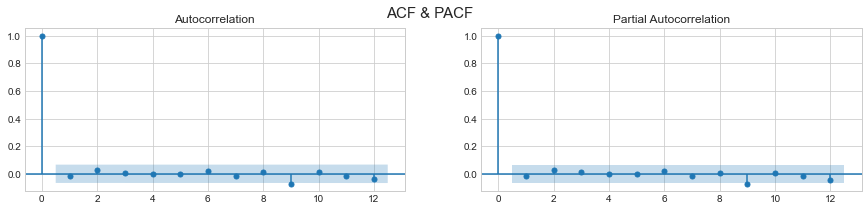

In [10]:
# ACF/PACF with residual
plot_model_ACF_PACF(res_arima)

In [11]:
# SARIMA model(log)
res_arima_log = auto_arima(train_log_data, m=7, seasonal=True, start_p=1, max_p=12, start_q=1, max_q=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)
res_arima_log.summary() # log를 취했으므로 -값이 나옴. 

 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-3056.878, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-3056.711, Time=0.28 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=-3054.922, Time=0.37 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-3056.765, Time=0.09 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-3054.866, Time=0.43 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=-3052.951, Time=0.65 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=-3054.942, Time=0.19 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=-3052.956, Time=1.53 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=-3050.942, Time=0.76 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-3057.888, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-3057.565, Time=0.31 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=-3055.801, Time=0.76 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=-3057.618, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=-3055.724, Time=0.41 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=-3053.832, Time=1.55

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  876
Model:               SARIMAX(2, 1, 0)   Log Likelihood                1533.682
Date:                Tue, 27 Apr 2021   AIC                          -3059.365
Time:                        20:43:31   BIC                          -3040.268
Sample:                             0   HQIC                         -3052.060
                                - 876                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0005      0.002     -0.324      0.746      -0.003       0.002
ar.L1         -0.0585      0.026     -2.283      0.022      -0.109      -0.008
ar.L2          0.0597      0.032      1.890      0.059      -0.002       0.122
sigma2         0.0018    2.8e-05     62.801      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13092.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -1.62
Prob(H) (two-sided):                  0.91   Kurtosis:                        21.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

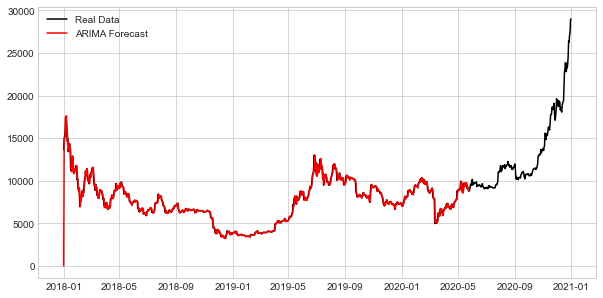

In [12]:
# Check model with train_data
plot_model_fit(data, train_data, res_arima_log, type='log')

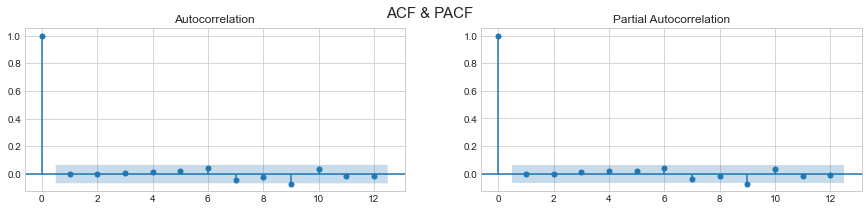

In [13]:
# ACF/PACF with residual
plot_model_ACF_PACF(res_arima_log)

## 1-4. Forecast

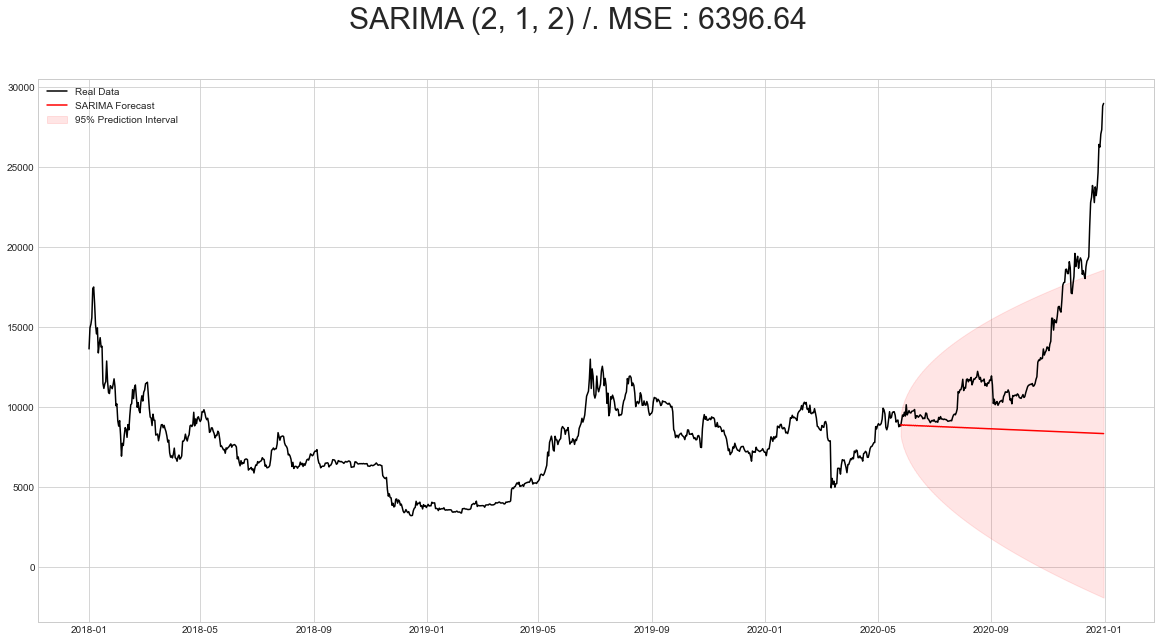

In [14]:
# Model predict & plotting(Not log)
plot_forecast(data, res_arima, test_data)

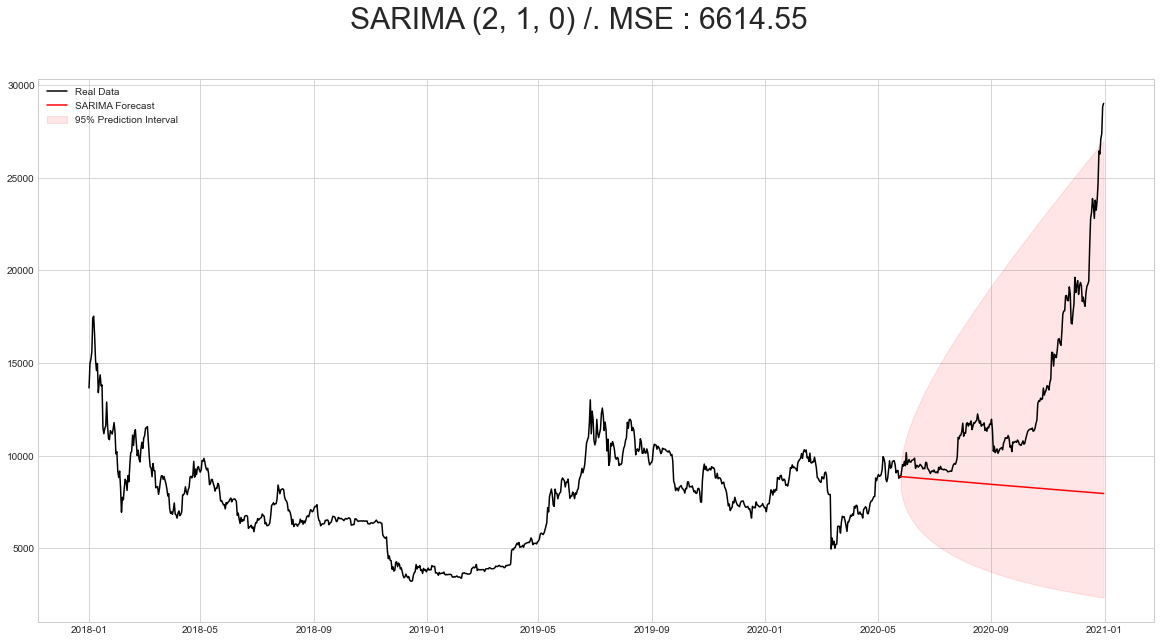

In [15]:
# Model predict & plotting(log)
plot_forecast(data, res_arima_log, test_log_data, type='log')

# 2. ARCH

## 2.1 Data load & Data Check

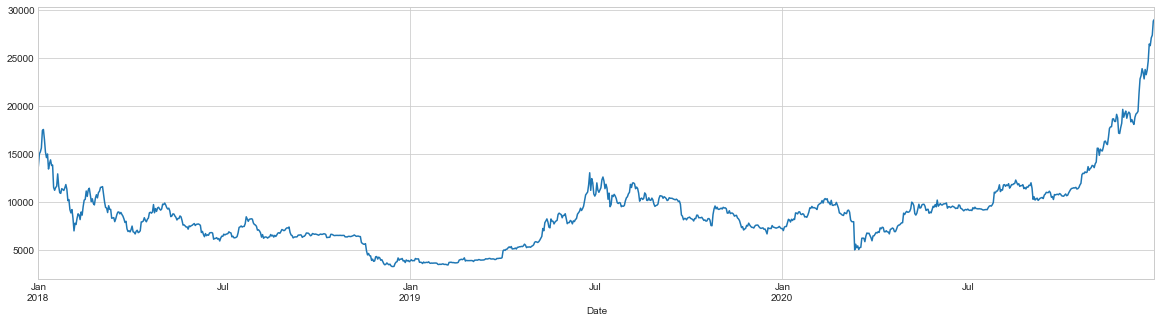

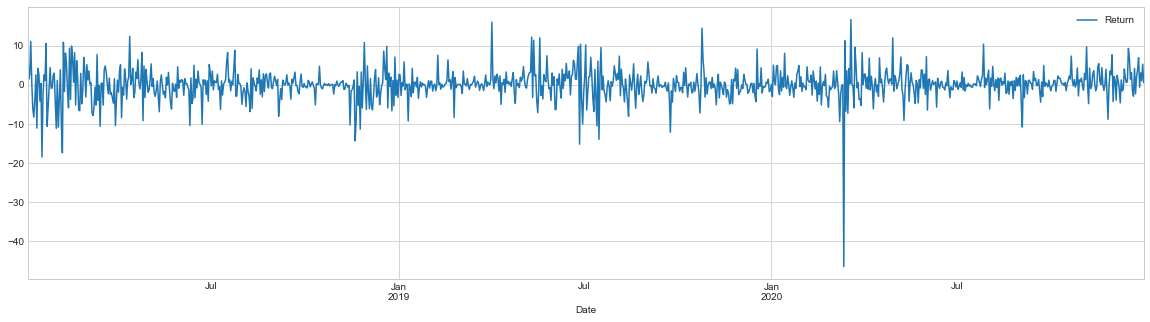

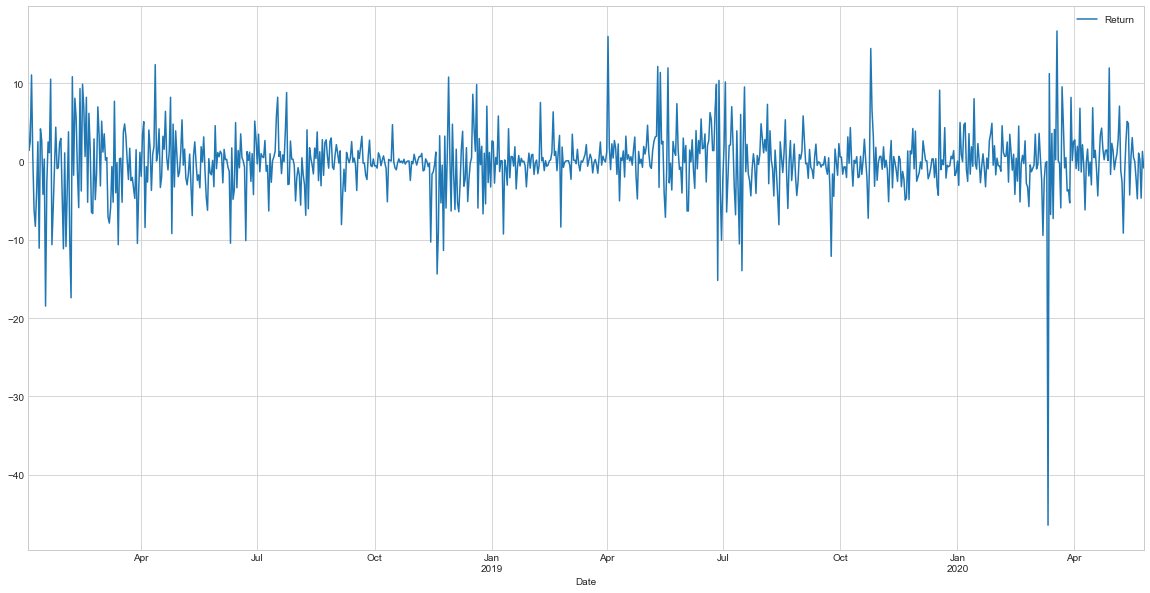

In [3]:
# Data load & plotting
price, ret, train_data, test_data = arch_data_load(data)

fig = price.plot(figsize=(20, 5))
fig = ret.plot(figsize=(20, 5))
fig = train_data.plot(figsize=(20,10))

## 2-2. Model Identification

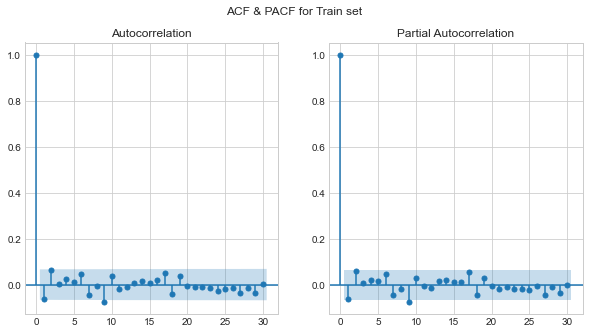

In [17]:
# ACF & PACF check
plot_ACF_PACF(train_data)

In [18]:
# Stationarity Test
arch_ADF_KPSS_test(train_data)

ADF P-value for raw: 0.000000
KPSS P-value for raw: 0.100000


## 2.3 Modeling

In [4]:
# ARCH Modeling
lag_p = 7
res_arch =arch_model(train_data, p=lag_p, q=0).fit()

res_arch.summary()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 2730.4019931975363
Iteration:      2,   Func. Count:     23,   Neg. LLF: 3910.438527690757
Iteration:      3,   Func. Count:     35,   Neg. LLF: 14979.750870707858
Iteration:      4,   Func. Count:     46,   Neg. LLF: 10429.609055690207
Iteration:      5,   Func. Count:     57,   Neg. LLF: 3717.928864087447
Iteration:      6,   Func. Count:     69,   Neg. LLF: 5164.157088478974
Iteration:      7,   Func. Count:     80,   Neg. LLF: 3483.6153317123462
Iteration:      8,   Func. Count:     91,   Neg. LLF: 2441.679196661674
Iteration:      9,   Func. Count:    103,   Neg. LLF: 2436.7148065087094
Iteration:     10,   Func. Count:    114,   Neg. LLF: 2431.803613420381
Iteration:     11,   Func. Count:    125,   Neg. LLF: 2420.327648372131
Iteration:     12,   Func. Count:    136,   Neg. LLF: 2417.6410609507448
Iteration:     13,   Func. Count:    147,   Neg. LLF: 2416.874762496898
Iteration:     14,   Func. Count:    157,   Neg. LLF: 2423

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2416.80
Distribution:                  Normal   AIC:                           4851.60
Method:            Maximum Likelihood   BIC:                           4894.58
                                        No. Observations:                  876
Date:                Wed, Apr 28 2021   Df Residuals:                      875
Time:                        13:23:24   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0577      0.115     -0.500      0.617 [ -0.284,  0.168]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          7.2329      1.519      4.761  1.930e-06      [  4.255, 10.211]
alpha[1]       0.0549  5.187e-02      1.058      0.290   [-4.678e-02,  0.157]
alpha[2]       0.0474  5.602e-02      0.847      0.397   [-6.236e-02,  0.157]
alpha[3]   4.1898e-03  3.371e-02      0.124      0.901 [-6.189e-02,7.027e-02]
alpha[4]       0.3708      0.207      1.790  7.346e-02   [-3.523e-02,  0.777]
alpha[5]       0.0920  5.500e-02      1.673  9.437e-02   [-1.580e-02,  0.200]
alpha[6]       0.0617  7.660e-02      0.805      0.421   [-8.843e-02,  0.212]
alpha[7]       0.0392  2.667e-02      1.472      0.141 [-1.302e-02,9.151e-02]
=============================================================================

Covariance estimator: robust
"""

In [5]:
# GARCH Modelling
lag_p = 1
lag_q = 1
res_garch =arch_model(train_data, p=lag_p, q=lag_q).fit()

res_garch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3490.0172084186643
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4071.8197058051264
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2662.4750761317855
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2476.5824887181357
Iteration:      5,   Func. Count:     33,   Neg. LLF: 2455.5267021063964
Iteration:      6,   Func. Count:     38,   Neg. LLF: 2455.6206710162105
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2455.5137490982524
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2455.4928616117622
Iteration:      9,   Func. Count:     54,   Neg. LLF: 2455.4928616120665
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2455.4928616117622
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2455.49
Distribution:                  Normal   AIC:                           4918.99
Method:            Maximum Likelihood   BIC:                           4938.09
                                        No. Observations:                  876
Date:                Wed, Apr 28 2021   Df Residuals:                      875
Time:                        13:23:26   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0646      0.143      0.452      0.651 [ -0.216,  0.345]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.5179      0.623      2.436  1.483e-02    [  0.297,  2.739]
alpha[1]       0.1199  6.846e-02      1.751  7.987e-02 [-1.428e-02,  0.254]
beta[1]        0.8062  4.576e-02     17.616  1.846e-69    [  0.716,  0.896]
===========================================================================

Covariance estimator: robust
"""

## 2.4 Rolling Prediction

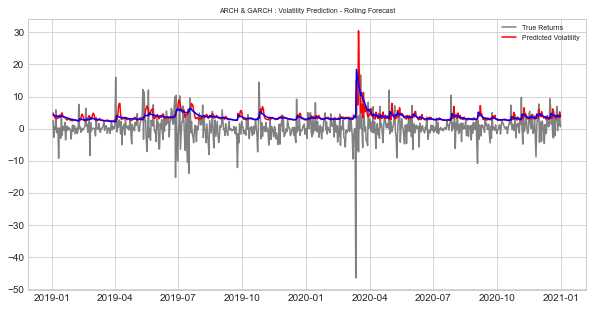

In [6]:
rolling_predictions_arch = rolling_prediction(data, ret, lag_p=7, lag_q=0)
rolling_predictions_garch = rolling_prediction(data, ret, lag_p=1, lag_q=1)

plot_rolling_predictions(ret, rolling_predictions_arch, rolling_predictions_garch)